In [1]:
# Step 0: Install required libraries in Google Colab
# Run this cell in Colab to ensure all dependencies are installed
try:
    import tensorflow
except ImportError:
    !pip install tensorflow
try:
    import sklearn
except ImportError:
    !pip install scikit-learn
try:
    import matplotlib
except ImportError:
    !pip install matplotlib

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [3]:
# Step 1: Loading the dataset
# Instructions:
# - In Google Colab: Upload 'housing.csv' via the Files tab (left sidebar)
# - In Jupyter: Ensure 'housing.csv' is in the same directory as this notebook
# Define column names for the Boston Housing dataset
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

try:
    # Reading the CSV file
    # Using delim_whitespace=True for space-separated data
    df = pd.read_csv(
        '/content/housing.csv',
        delim_whitespace=True,
        names=column_names,
        skipinitialspace=True,
        skiprows=0
    )
    print("Dataset loaded successfully!")
    print("First few rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'housing.csv' not found. Please upload the file in Colab or place it in the Jupyter directory.")
    raise
except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    raise

Dataset loaded successfully!
First few rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


<ipython-input-3-7cf6e8859529>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [4]:
# Step 2: Data Preprocessing
try:
    # Checking for missing values
    print("\nChecking for missing values:")
    print(df.isnull().sum())

    # Separating features (X) and target (y)
    X = df.drop('MEDV', axis=1)
    y = df['MEDV']

    # Splitting the data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("\nData preprocessing completed successfully!")
except Exception as e:
    print(f"Error in preprocessing: {str(e)}")
    raise



Checking for missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Data preprocessing completed successfully!


In [5]:
# Step 3: Building the Deep Neural Network
try:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    print("\nNeural network model built successfully!")
except Exception as e:
    print(f"Error building model: {str(e)}")
    raise

# Step 4: Compiling the model
try:
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    print("\nModel compiled successfully!")
except Exception as e:
    print(f"Error compiling model: {str(e)}")
    raise




Neural network model built successfully!

Model compiled successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 5: Training the model
try:
    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    print("\nModel training completed successfully!")
except Exception as e:
    print(f"Error training model: {str(e)}")
    raise

# Step 6: Evaluating the model
try:
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nTest Mean Absolute Error: ${test_mae:.2f}K")
    print(f"Test Mean Squared Error: {test_loss:.2f}")
except Exception as e:
    print(f"Error evaluating model: {str(e)}")
    raise

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 609.2120 - mae: 22.7224 - val_loss: 529.5982 - val_mae: 21.4494
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 627.5378 - mae: 22.9831 - val_loss: 498.7522 - val_mae: 20.7196
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 528.9150 - mae: 21.0271 - val_loss: 450.3909 - val_mae: 19.5167
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 466.3492 - mae: 19.5092 - val_loss: 377.4296 - val_mae: 17.5628
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 411.0664 - mae: 17.6809 - val_loss: 276.3903 - val_mae: 14.5742
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 261.3094 - mae: 13.6304 - val_loss: 166.6708 - val_mae: 10.6068
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 157.6794 - mae: 10.1184 - val_loss: 88.1049 - val_mae: 6.9690
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 113.4294 - mae: 8.3998 - val_loss: 59.1590 - val_mae: 5.4757
Epoch 9/100
11/1

In [7]:
# Step 7: Making predictions
try:
    y_pred = model.predict(X_test_scaled)
    print("\nPredictions generated successfully!")
except Exception as e:
    print(f"Error making predictions: {str(e)}")
    raise

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predictions generated successfully!


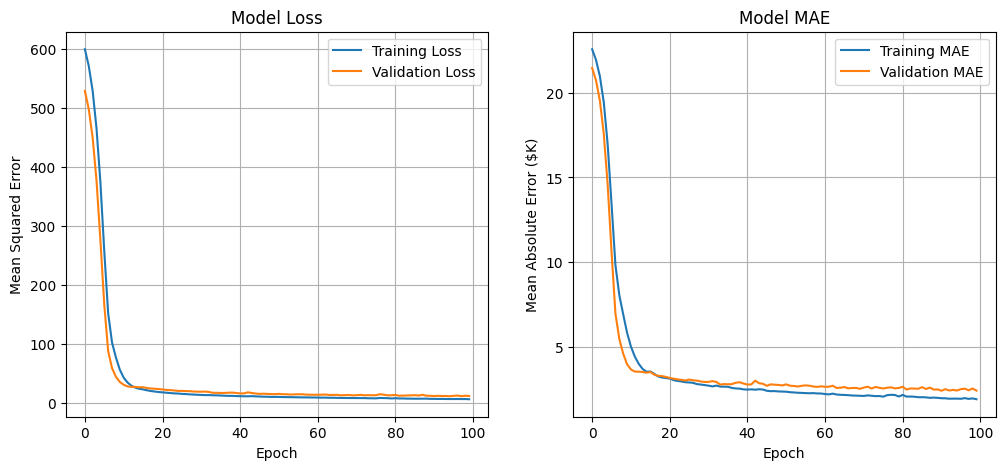


Training metrics plot displayed and saved as 'training_metrics.png'


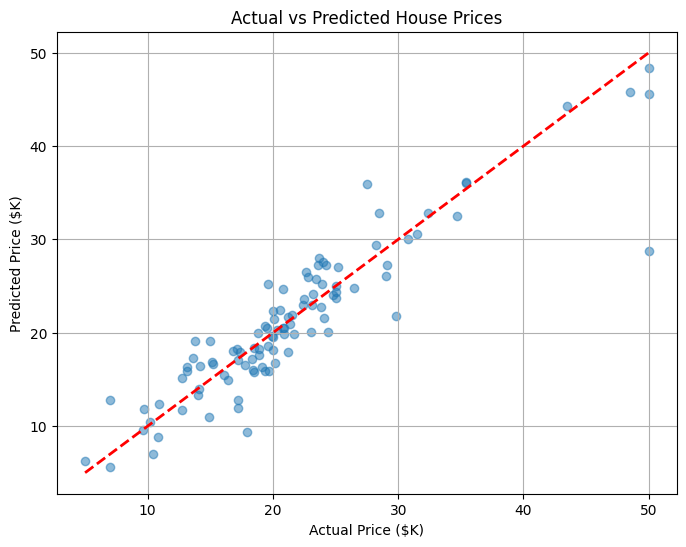

Predictions vs actual plot displayed and saved as 'predictions_vs_actual.png'


In [8]:
# Step 8: Visualizing the training process
try:
    plt.figure(figsize=(12, 5))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)

    # Plotting MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error ($K)')
    plt.legend()
    plt.grid(True)

    # Display the plot in the notebook
    plt.show()

    # Saving the plot
    plt.savefig('training_metrics.png')
    plt.close()
    print("\nTraining metrics plot displayed and saved as 'training_metrics.png'")
except Exception as e:
    print(f"Error visualizing training metrics: {str(e)}")
    raise

# Step 9: Visualizing predictions vs actual values
try:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Price ($K)')
    plt.ylabel('Predicted Price ($K)')
    plt.title('Actual vs Predicted House Prices')
    plt.grid(True)

    # Display the plot in the notebook
    plt.show()

    # Saving the scatter plot
    plt.savefig('predictions_vs_actual.png')
    plt.close()
    print("Predictions vs actual plot displayed and saved as 'predictions_vs_actual.png'")
except Exception as e:
    print(f"Error visualizing predictions: {str(e)}")
    raise


In [9]:
# Step 10: Saving the model
try:
    model.save('boston_housing_dnn.h5')
    print("\nModel saved as 'boston_housing_dnn.h5'")
except Exception as e:
    print(f"Error saving model: {str(e)}")
    raise

print("\nAll processes completed successfully!")


Model saved as 'boston_housing_dnn.h5'

All processes completed successfully!
